In [2]:
# fma_small datast with 8 classes including data augmentation with pitch and time shift.Spectrogram was made using librosa and Convnets were used 

In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv1D, Conv2D, Flatten, BatchNormalization, ZeroPadding2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import SGD
import keras.backend as K
from keras.models import load_modeldata['path'] = data['folder_number'].astype('str') + '/' + data['file_name'].astype('str') + ".mp3"
data['path'].head(5)
from keras.callbacks import EarlyStopping

%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import numpy as np
from numpy import argmax
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

/home/rs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: P

In [ ]:
# Data Preprocessing

In [3]:
# Read Data 
data = pd.read_csv(r'music_analysis.csv')
data.head(10)

file_name         genre
0          2       Hip-Hop
1          5       Hip-Hop
2         10           Pop
3        140          Folk
4        141          Folk
5        148  Experimental
6        182          Rock
7        190          Folk
8        193          Folk
9        194          Folk

In [4]:
data.shape

(7997, 2)

In [5]:
def folder_name(i):
    if i < 18000:
        return '0'
    elif i >= 18000 and i < 41000:
        return '1'
    elif i >= 41000 and i < 57000:
        return '2'
    elif i >= 57000 and i < 72000:
        return '3'
    elif i >= 72000 and i < 89000:
        return '4'
    elif i >= 89000 and i < 108000:
        return '5'
    elif i >= 108000 and i < 117000:
        return '6'
    elif i >= 117000 and i < 127000:
        return '7'

In [6]:
def genre_number(i):
    if i == 'Hip-Hop':
        return 0
    elif i == 'Pop':
        return 1
    elif i == 'Folk':
        return 2
    elif i == 'Rock':
        return 3
    elif i == 'Experimental':
        return 4
    elif i == 'International':
        return 5
    elif i == 'Electronic':
        return 6
    else:
        return '7' #instrumental

In [7]:
data['genre_number'] = data['genre'].apply(genre_number)
data['folder_number'] = data['file_name'].apply(folder_name)

In [8]:
data['file_name'] = data['file_name'].apply(lambda x: '{0:0>6}'.format(x))

In [9]:
data['path'] = data['folder_number'].astype('str') + '/' + data['file_name'].astype('str') + ".wav"
data['path'].head(5)

0    0/000002.wav
1    0/000005.wav
2    0/000010.wav
3    0/000140.wav
4    0/000141.wav
Name: path, dtype: object

In [ ]:
# Example of Hip-Hop music
y, sr = librosa.load(r'../fma_small/000/000002.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

In [13]:
ps

array([[2.30999531e-06, 4.52149318e-03, 3.33530598e-02, ...,
        3.61769430e+00, 1.86100157e+00, 1.36785054e+00],
       [5.55762865e-06, 2.68974733e-03, 1.16586415e-02, ...,
        8.31609355e-02, 3.81103308e-02, 4.23872918e-02],
       [3.02332481e-05, 6.66967058e-04, 2.45335816e-03, ...,
        5.97121036e-02, 2.43003800e-02, 7.46391746e-02],
       ...,
       [8.32381715e-07, 6.09348785e-05, 2.29561496e-04, ...,
        4.71445871e-02, 1.12772255e-01, 1.92682742e-01],
       [1.43928574e-07, 1.21778996e-05, 7.89224156e-05, ...,
        2.12322481e-02, 3.96712278e-02, 4.42994969e-02],
       [1.44567798e-09, 1.16488391e-07, 4.41530604e-06, ...,
        1.11739100e-03, 8.00643339e-04, 1.23028152e-03]])

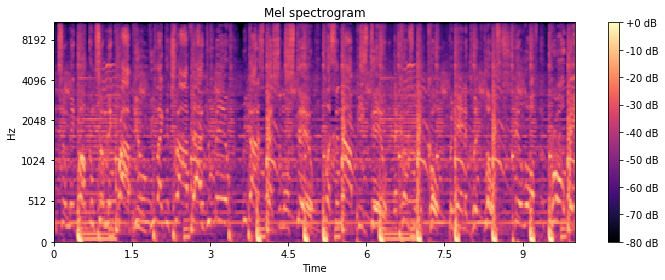

In [15]:
#Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [16]:
# Example of Pop music
y, sr = librosa.load(r'C:\Users\Saksham Sharma\Desktop\project\myproject\music_genre\fma_small\0/000010.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [17]:
IPython.display.Audio(data=y, rate=sr)

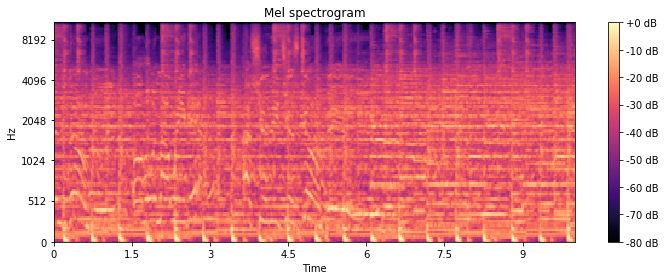

In [18]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [19]:
# Example of Rock music
y, sr = librosa.load(r'C:\Users\Saksham Sharma\Desktop\project\myproject\music_genre\fma_small\0/000255.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [20]:
IPython.display.Audio(data=y, rate=sr)

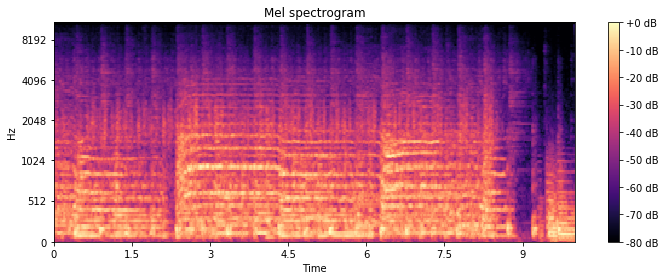

In [21]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
# Data augmentation (time stretch, pitch shift)

In [ ]:
rate = 0.8 

for row in data.itertuples():
    y, sr = librosa.load('./fma_small/' + row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    librosa.output.write_wav('fma_small_augmented/' + row.path ,y_changed, sr)

In [11]:
rate = 0.9

for row in data.itertuples():
    y, sr = librosa.load('C://Users/Saksham Sharma/Desktop/project/music_genre/fma_small/' + row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    librosa.output.write_wav('C://Users/Saksham Sharma/Desktop/project/music_genre/fma_small_augmented2/' + row.path ,y_changed, sr)

In [20]:
n_steps = 2 

for row in data.itertuples():
    y, sr = librosa.load('C://Users/Saksham Sharma/Desktop/project/music_genre/fma_small/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    librosa.output.write_wav('C://Users/Saksham Sharma/Desktop/project/music_genre/fma_small_augmented1/' + row.path ,y_changed, sr)

In [9]:
n_steps = -2 

for row in data.itertuples():
    y, sr = librosa.load('C:/Users/Saksham Sharma/Desktop/project/myproject/music_genre/fma_small/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    librosa.output.write_wav(r'C:/Users/Saksham Sharma/Desktop/project/myproject/music_genre/fma_small_augmented3/' + row.path ,y_changed, sr)

In [ ]:
# Augmented comparison

In [22]:
# Example of Rock music (original)
y, sr = librosa.load(r'C:\Users\Saksham Sharma\Desktop\project\myproject\music_genre\fma_small\0/000002.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [23]:
 IPython.display.Audio(data=y, rate=sr)

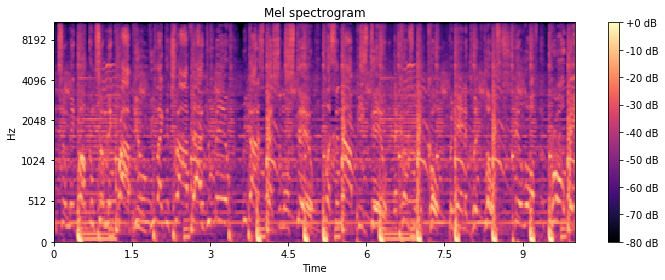

In [24]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [25]:
# Example of Rock music (time-stretch 0.8)
y, sr = librosa.load(r'C:\Users\Saksham Sharma\Desktop\project\myproject\music_genre\fma_small_augmented\0/000002.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [26]:
IPython.display.Audio(data=y, rate=sr)

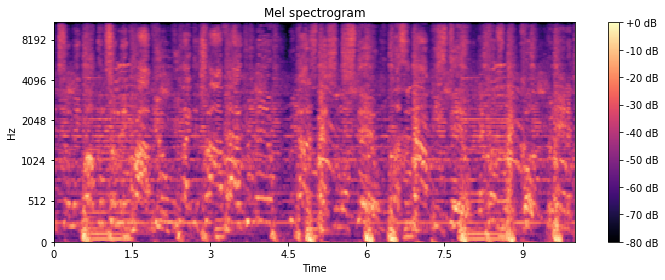

In [27]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [28]:
# Example of Rock music (pitch-shift 2)
y, sr = librosa.load(r'C:\Users\Saksham Sharma\Desktop\project\myproject\music_genre\fma_small_augmented1\0/000002.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [29]:
IPython.display.Audio(data=y, rate=sr)

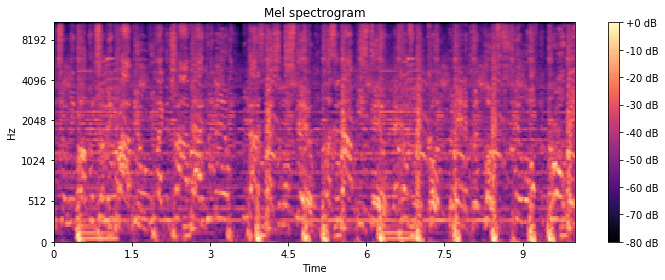

In [30]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
# Dataset Append

In [9]:
D1 = [] # Dataset1

for row in data.itertuples():
    y, sr = librosa.load(r'C://Users/Saksham Sharma/Desktop/project/myproject/music_genre/fma_small/' + row.path, duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D1.append( (ps, row.genre_number) )

In [10]:
D2 = [] # Dataset2 (time stretch 0.8)

for row in data.itertuples():
    y, sr = librosa.load(r'C://Users/Saksham Sharma/Desktop/project/myproject/music_genre/fma_small_augmented/' + row.path, duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D2.append( (ps, row.genre_number) )
    

In [11]:
D3 = [] # Dataset3 (pitch shift 2)

for row in data.itertuples():
    y, sr = librosa.load(r'C://Users/Saksham Sharma/Desktop/project/myproject/music_genre/fma_small_augmented1/' + row.path, duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D3.append( (ps, row.genre_number) )
    

In [12]:
D4 = [] # Dataset4 (time stretch 1.1)

for row in data.itertuples():
    y, sr = librosa.load(r'C://Users/Saksham Sharma/Desktop/project/myproject/music_genre/fma_small_augmented2/' + row.path, duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D4.append( (ps, row.genre_number) )
    

In [13]:
D5 = [] # Dataset5 (pitch shift -2)

for row in data.itertuples():
    y, sr = librosa.load(r'C://Users/Saksham Sharma/Desktop/project/myproject/music_genre/fma_small_augmented3/' + row.path, duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D5.append( (ps, row.genre_number) )
    

In [14]:
D = D1 + D2 + D3 + D4 + D5

In [15]:
print("Nu|mber of samples: ", len(D))

Nu|mber of samples:  39945


In [ ]:
# CNN Modeling

In [16]:
dataset = D
random.shuffle(dataset)

#train dev test split 8:1:1
train = dataset[:32000]
dev = dataset[32000:36000]
test = dataset[36000:]

X_train, Y_train = zip(*train)
X_dev, Y_dev = zip(*dev)
X_test, Y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 431, 1) ) for x in X_train])
X_dev = np.array([x.reshape( (128, 431, 1) ) for x in X_dev])
X_test = np.array([x.reshape( (128, 431, 1) ) for x in X_test])

# One-Hot encoding for classes
Y_train = np.array(keras.utils.to_categorical(Y_train, 8))
Y_dev = np.array(keras.utils.to_categorical(Y_dev, 8))
Y_test = np.array(keras.utils.to_categorical(Y_test, 8))

In [53]:
model = Sequential()
input_shape=(128, 431, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(8))
model.add(Activation('softmax'))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 124, 427, 24)      624       
_________________________________________________________________
average_pooling2d_27 (Averag (None, 62, 213, 24)       0         
_________________________________________________________________
activation_57 (Activation)   (None, 62, 213, 24)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 62, 213, 48)       28848     
_________________________________________________________________
average_pooling2d_28 (Averag (None, 31, 106, 48)       0         
_________________________________________________________________
activation_58 (Activation)   (None, 31, 106, 48)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 31, 106, 48)       57648     
__________

In [55]:
epochs = 100
batch_size = 64
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

Train on 32000 samples, validate on 4000 samples
Epoch 1/100
32000/32000 [==============================] - 125s 4ms/step - loss: 1.8396 - acc: 0.3030 - val_loss: 1.5673 - val_acc: 0.4345
Epoch 2/100
32000/32000 [==============================] - 116s 4ms/step - loss: 1.6056 - acc: 0.4187 - val_loss: 1.4812 - val_acc: 0.4763
Epoch 3/100
32000/32000 [==============================] - 121s 4ms/step - loss: 1.5079 - acc: 0.4603 - val_loss: 1.4251 - val_acc: 0.4953
Epoch 4/100
32000/32000 [==============================] - 111s 3ms/step - loss: 1.4393 - acc: 0.4878 - val_loss: 1.3473 - val_acc: 0.5182
Epoch 5/100
32000/32000 [==============================] - 104s 3ms/step - loss: 1.3666 - acc: 0.5092 - val_loss: 1.2878 - val_acc: 0.5427
Epoch 6/100
32000/32000 [==============================] - 105s 3ms/step - loss: 1.3146 - acc: 0.5289 - val_loss: 1.2805 - val_acc: 0.5463
Epoch 7/100
32000/32000 [==============================] - 108s 3ms/step - loss: 1.2459 - acc: 0.5498 - val_loss: 1.2

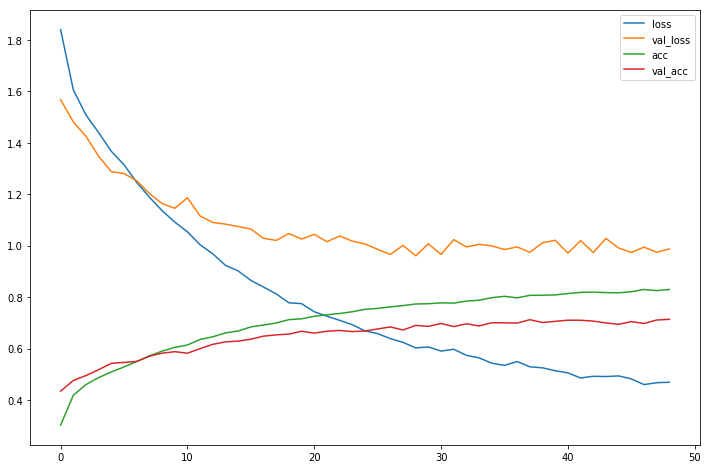

3945/3945 [==============================] - 22s 6ms/step
Test loss: 1.0181573933672694
Test accuracy: 0.7128010139719162


In [56]:
with K.tf.device('/gpu:0'):
    tb_hist = keras.callbacks.TensorBoard(log_dir='C:/Users/Saksham Sharma/.keras/graph', histogram_freq=0, write_graph=True, write_images=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
    hist = model.fit(x=X_train, y=Y_train, epochs=epochs, batch_size=batch_size, validation_data= (X_dev, Y_dev), callbacks=[early_stopping, tb_hist]) 

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

score = model.evaluate(x=X_test, y=Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Model Predict

In [58]:
model = load_model('music_genre_classification.h5')

In [59]:
# Read Test Data
data = pd.read_csv(r'C:\Users\Saksham Sharma\Desktop\project\myproject\music_genre\music_test.csv')

In [60]:
def genre_number(i):
    if i == 'Hip-Hop':
        return 0
    elif i == 'Pop':
        return 1
    elif i == 'Folk':
        return 2
    elif i == 'Rock':
        return 3
    elif i == 'Experimental':
        return 4
    elif i == 'International':
        return 5
    elif i == 'Electronic':
        return 6
    else:
        return '7'
    
data['genre_number'] = data['genre'].apply(genre_number)
data['file_name'] = data['file_name'].apply(lambda x: '{0:0>6}'.format(x))
data['path'] = data['file_name'].astype('str') + ".wav"
data['path'].head(5)

0    000002.wav
1    000005.wav
2    000010.wav
3    000140.wav
4    000141.wav
Name: path, dtype: object

In [61]:
D = [] # test dataset

for row in data.itertuples():
    y, sr = librosa.load(r'C:/Users/Saksham Sharma/Desktop/project/myproject/music_genre/fma_small/0/' + row.path, duration=10)
    ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    if ps.shape != (128, 431): continue
    D.append( (ps, row.genre_number) )

In [62]:
print("Number of samples: ", len(D))

Nu|mber of samples:  810


In [63]:
test = D
X_test, Y_test = zip(*test)
X_test = np.array([x.reshape( (128, 431, 1) ) for x in X_test])
Y_test = np.array(keras.utils.to_categorical(Y_test, 8))

In [64]:
yhat = model.predict_classes(X_test)

for i in range(len(D)):
    print('file_name: ' + data['file_name'][i] + ' True: ' + str(argmax(Y_test[i])) + ', Predict: ' + str(yhat[i]))

file_name: 000002 True: 0, Predict: 0
file_name: 000005 True: 0, Predict: 0
file_name: 000010 True: 1, Predict: 1
file_name: 000140 True: 2, Predict: 2
file_name: 000141 True: 2, Predict: 2
file_name: 000148 True: 4, Predict: 4
file_name: 000182 True: 3, Predict: 3
file_name: 000190 True: 2, Predict: 2
file_name: 000193 True: 2, Predict: 2
file_name: 000194 True: 2, Predict: 2
file_name: 000197 True: 2, Predict: 2
file_name: 000200 True: 2, Predict: 2
file_name: 000203 True: 2, Predict: 2
file_name: 000204 True: 2, Predict: 2
file_name: 000207 True: 2, Predict: 2
file_name: 000210 True: 2, Predict: 2
file_name: 000211 True: 2, Predict: 2
file_name: 000212 True: 2, Predict: 2
file_name: 000213 True: 1, Predict: 1
file_name: 000255 True: 3, Predict: 3
file_name: 000256 True: 3, Predict: 3
file_name: 000368 True: 3, Predict: 3
file_name: 000424 True: 4, Predict: 4
file_name: 000459 True: 3, Predict: 3
file_name: 000534 True: 2, Predict: 2
file_name: 000540 True: 2, Predict: 2
file_name: 0